# Projet fianace du marché 2 et quelques codes correspondantes
PS: la partie A est juste pour calculer un X_opt, la partie B et la partie C sont plus importantes，surtout partie C

### A.1 scinder le fichier de façon à ce que BD[i] corresponde aux données de l’action i, puis calculer ER, qui est une liste de 12 éléments, chacun représentant le taux de rendement attendu de chaque action.

In [10]:
#contenu de excel "Actif","Dates","Ouverture","Max","Min","Fermeture","Volume"
import numpy as np
import numpy.linalg as cm
import pandas as pd
import glob


file_list = glob.glob('actions/*.xlsm')


BD = [pd.read_excel(file, engine='openpyxl') for file in file_list]

#ER est un vecteur de taille 12 qui contient les rendements moyens des 12 actions
ER = np.ones((12,1)) 
for j in range(12):
    bd = BD[j] 
    St= [(bd.iloc[i, 3]+bd.iloc[i, 4])/2 for i in range(255)] #St est le prix moyen de chaque action
    Rt= [(St[i+1]/St[i]) -1 for i in range(254)] #Rt est le rendement de chaque action
    ER[j] = np.mean(Rt) #ER[j] est le rendement moyen de l'action j


### A.2 Calculer dans la fonction de la frontière efficiente les paramètres 

La formule est la suivante : $$m_{\sigma} = \frac{b}{a} + \sqrt{\sigma^2 - \frac{1}{a}} \times norm$$
où $$m_{\sigma}$$  représente le rendement espéré maximal correspondant à la valeur de 𝜎


In [11]:
#SIGMA est la matrice de covariance des rendements des 12 actions
SIGMA = np.ones((12,12))

for i in range(12):
    for j in range(12):
        bdi = BD[i]
        Sti = [(bdi.iloc[k, 3]+bdi.iloc[k, 4])/2 for k in range(255)]
        Rti = [(Sti[k+1]/Sti[k]) -1 for k in range(254)] #Rti est le rendement de l'action i
        RtiC=Rti-np.mean(Rti) #RtiC est le rendement de l'action i centré
        #Rti=np.array(Rti)
        #RtiC=Rti-ER[i]
        
        bdj = BD[j]
        Stj = [(bdj.iloc[k, 3]+bdj.iloc[k, 4])/2 for k in range(255)]
        Rtj = [Stj[k+1]/Stj[k] -1 for k in range(254)] #Rtj est le rendement de l'action j
        RtjC=Rtj-np.mean(Rtj) #RtjC est le rendement de l'action j centré
        #Rtj=np.array(Rtj)
        #RtjC=Rtj-ER[j]

        # listeV est une liste de taille 254 qui contient les valeurs de la covariance de chaque couple de rendements
        #listeV = [RtiC[k]*RtjC[k] for k in range(254)] #cov(X,Y) = E[(X - E[X])(Y - E[Y])]
        listeV=[RtiC*RtjC ]
        SIGMA[i,j] = np.mean(listeV)


#Vérification 
print('determinant: ',np.linalg.det(SIGMA))
SIGMA_inv = cm.inv(SIGMA)
print('SIGMA_inv: ',SIGMA_inv)
vect1 = np.ones((12,1)) 
vect1T = np.transpose(vect1)
a = np.dot(vect1T,np.dot(SIGMA_inv,vect1))
print('a: ',a)
a=a[0][0]
print('a: ',a)
b=np.dot(vect1T,np.dot(SIGMA_inv,ER))
print('b: ',b)
b=b[0][0]
print('b: ',b)



vect = ER-(b/a)*vect1
vectT = np.transpose(vect)
norm2 = np.dot(vectT,np.dot(SIGMA_inv,vect))
norm2 = norm2[0][0]
norm = np.sqrt(norm2)
print('norm: ',norm2)

        

determinant:  1.7470455596539675e-48
SIGMA_inv:  [[ 2.94689411e+03 -6.96709486e+02  8.99074220e+00 -5.24411228e+02
   1.68941456e+02  7.37476165e+01  8.13750198e+01 -1.48037647e+01
  -1.23021941e+03 -2.23710796e+02  1.55850458e+02 -6.48114206e+02]
 [-6.96709486e+02  1.60761396e+04 -1.63114727e+03 -2.64677697e+03
  -3.45747860e+02  6.45772107e+02 -1.82550267e+03 -1.68036989e+03
  -2.90104446e+03 -6.92694723e+03  6.26968348e+02 -4.76335646e+02]
 [ 8.99074220e+00 -1.63114727e+03  1.45912406e+04 -4.92197815e+02
  -2.20684751e+03  8.94453677e+01 -5.08879934e+02  5.80951753e+02
  -1.62280035e+03 -1.76895593e+03 -2.94910331e+03 -7.48971789e+02]
 [-5.24411228e+02 -2.64677697e+03 -4.92197815e+02  1.56847711e+04
  -2.77228474e+03 -7.30772197e+02 -1.06525966e+03  2.82882961e+02
  -1.96778188e+03  8.74934819e+01 -8.43163082e+02 -9.97592070e+02]
 [ 1.68941456e+02 -3.45747860e+02 -2.20684751e+03 -2.77228474e+03
   9.91947578e+03 -4.18747372e+02 -1.12393864e+03 -2.00502083e+03
   1.31521266e+03 -5.06

### A.3.Tracer les 3 courbes correspondantes

/var/folders/b4/6b5cdwqx3qd94p_4bdv167zm0000gn/T/ipykernel_29765/2461624801.py:4: RuntimeWarning: invalid value encountered in sqrt
  y = b/a + np.sqrt(sigma**2 - 1/a)*norm
/var/folders/b4/6b5cdwqx3qd94p_4bdv167zm0000gn/T/ipykernel_29765/2461624801.py:9: RuntimeWarning: invalid value encountered in sqrt
  y = b/a - np.sqrt(sigma**2 - 1/a)*norm


Text(0.5, 0, 'sigma')

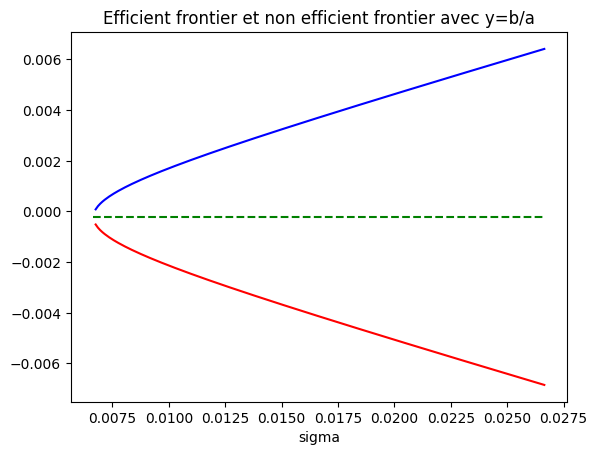

In [12]:
import matplotlib.pyplot as plt
#frontière efficiente
def FE(a,b,sigma,norm):
    y = b/a + np.sqrt(sigma**2 - 1/a)*norm
    return y

#frontière non efficiente
def FNE(a,b,sigma,norm):
    y = b/a - np.sqrt(sigma**2 - 1/a)*norm
    return y

#constante
def cste(a,b):
    y = b/a
    return y

axesigma = np.linspace(1/np.sqrt(a),4/np.sqrt(a),200)
axey1 = [FE(a,b,sigma,norm) for sigma in axesigma]
axey2 = [FNE(a,b,sigma,norm) for sigma in axesigma]
axey3 = [cste(a,b) for sigma in axesigma]
plt.title('Efficient frontier et non efficient frontier avec y=b/a')
plt.plot(axesigma,axey1,label='Efficient frontier',color='blue')
plt.plot(axesigma,axey2,label='Non efficient frontier',color='red')
plt.plot(axesigma,axey3,label='y=b/a',color='green',linestyle='--')
plt.xlabel('sigma')



### A.4.Générer aléatoirement 𝑋 (c’est-à-dire la répartition en pourcentages pour chacun des 12 actions). L’axe des abscisses représente l’écart-type σ du portefeuille, et l’axe des ordonnées représente le rendement espéré ER.

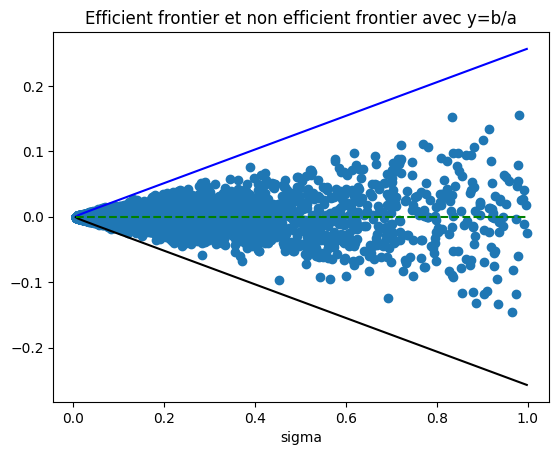

In [13]:
# point de nuage
import numpy.random as npr
NS = 50000
AX1 = []
AX2 = []
for j in range(NS):
    x = npr.randn(12) #gnere 12 valeurs aléatoires normales
    s= np.sum(x) 
    if s==0:
        x[0]+=1 
    else:
        x = x/s 
    xT = np.transpose(x) 
    #esp = np.dot(x,ER) 
    esp = np.dot(xT,ER)
    var = np.dot(xT,np.dot(SIGMA,x)) #！！！variance
    sig = np.sqrt(var) 
    if sig<=1:
        AX1.append(sig)
        AX2.append(esp)

plt.scatter(AX1,AX2)

axesigma = np.linspace(min(AX1),max(AX1),200)
#axesigma = np.linspace(1/np.sqrt(a),4/np.sqrt(a),200)
axey1 = [FE(a,b,sigma,norm) for sigma in axesigma]
axey2 = [FNE(a,b,sigma,norm) for sigma in axesigma]
axey3 = [cste(a,b) for sigma in axesigma]


plt.title('Efficient frontier et non efficient frontier avec y=b/a')
plt.plot(axesigma,axey1,label='Efficient frontier',color='blue')
plt.plot(axesigma,axey2,label='Non efficient frontier',color='black')
plt.plot(axesigma,axey3,label='y=b/a',color='green',linestyle='--')
plt.xlabel('sigma')

plt.show()



    

### A.5. Répéter la simulation avec des poids générés aléatoirement, puis sélectionner les poids optimaux (critère de filtrage : $\sigma \le \sigma_{\max}$)

In [14]:
import numpy as np
import numpy.random as npr

# choix de sigma
Sigmax = 0.02  # contrainte de risque
Espmax = -10 * 10  # initialisation le rendement maximal

# initialisation du vecteur de poids optimal
x_opt = np.array([1 for _ in range(12)]) 


for _ in range(NS):
    # générer un vecteur de poids aléatoires
    x = [npr.uniform() for _ in range(12)]  # uniforme sur [0, 1]
    x = np.array(x)  # convertir en tableau numpy
    s = np.sum(x)  # somme des poids

    #  pas égal à 0
    if s == 0:
        x[0] = 1 # si la somme des poids est nulle, on met le premier poids à 1
    else:
        x = x / s  # normaliser les poids

    # calculer le rendement et le variance
    xT = np.transpose(x)  
    var = np.dot(xT, np.dot(SIGMA, x))  
    sig = np.sqrt(var)  
     
    # vérifier si la contrainte de risque est satisfaite

    if sig <= Sigmax:
        # calculer le rendement
        esp = np.dot(xT, ER)
        # vérifier si le rendement est supérieur à l'ancien rendement maximal
        if esp > Espmax:
            Espmax = esp  # mettre à jour le rendement maximal
            x_opt = x  # mettre à jour le vecteur de poids optimal

print("Portefeuille optimal x_opt :")
print(x_opt)
print(f"Rendement espéré correspondant : {Espmax}")
print(f"sigma correspondante : {Sigmax}")


Portefeuille optimal x_opt :
[0.02459803 0.00376264 0.0773506  0.00199885 0.21264789 0.02778258
 0.10677257 0.20773961 0.20990477 0.05699313 0.06300518 0.00744415]
Rendement espéré correspondant : [-7.60261594e-05]
sigma correspondante : 0.02


### A.6 bonus. Répéter la simulation avec des poids générés aléatoirement, puis sélectionner les poids optimaux (critère de filtrage : $$ \mathrm{VaR}_{95}(R^x) \le \frac{1}{100}$$）

In [15]:
import numpy as np
import numpy.random as npr


# calculate the return matrix Rti (12, 254)
Rti = np.zeros((12, 254))  
for j in range(12):
    bd = BD[j]
    St = [(bd.iloc[i, 3] + bd.iloc[i, 4]) / 2 for i in range(255)]
    Rti[j, :] = [(St[i + 1] / St[i]) - 1 for i in range(254)]  


# choix de VaR_max
VaR_max = 2/ 100  # !!!VaR constraint
Espmax = -np.inf  # initial maximum expected return
NS = 1000000  # random search times


# initial optimal portfolio
x_opt = np.array([1 for _ in range(12)]) 

# random search for optimal portfolio
for _ in range(NS):
    # random generate weights
    x = [npr.uniform() for _ in range(12)]  # generate weights from uniform distribution
    x = np.array(x)  # convert to numpy array
    s = np.sum(x)  #    sum of weights

    # make sure the sum of weights is not 0
    if s == 0:
        x[0] = 1 #  if the sum of weights is 0, set the first weight to 1
    else:
        x = x / s  # normalize weights

    #  calculate the expected return
    #Rt_x = X'*Rt  X' is the transpose of the weight vector
    x_T = np.transpose(x)  
    Rt_x =np.dot(x_T,Rti) #Rt_x is the return of the portfoli
    R_x_hist =np.array([Rt_x[i] for i in range(254)]) #R_x_hist is the return of the portfolio in the history
    
    # calculate the 95% VaR
    VaR_95 = np.quantile(-R_x_hist, 0.95) #!!!!

    #   check if the VaR constraint is satisfied
    if VaR_95 <= VaR_max:
        esp = np.dot(x, ER)  #  calculate the expected return
        if esp > Espmax:
            Espmax = esp
            x_opt = x  # update the optimal portfolio
    if VaR_95 <= VaR_max:
        break

# output the result

print("Portefeuille optimal x_opt :")
print(x_opt)
print(f"Rendement espéré correspondant : {Espmax}")
print(f"VaR_95 correspondante : {VaR_95}")


Portefeuille optimal x_opt :
[0.0268199  0.1554053  0.04243217 0.08653318 0.12015038 0.09767828
 0.07513491 0.02187888 0.06249203 0.08638495 0.12354026 0.10154976]
Rendement espéré correspondant : [-0.00074952]
VaR_95 correspondante : 0.014792520195232372


### B.1 Extraction des données de l'année 2019
### BD2019[i] représente la liste des prix de l'action i en 2019.

In [16]:
# genere un BD qui contient seulement les données de 2019
BD2019 = []

for df in BD:
    # convertir la colonne de date en format datetime

    df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1], format='%d/%m/%Y') # iloc[:, 1] choisi la colonne de date
    # filtrer les données de 2019
    df_2019 = df[df.iloc[:, 1].dt.year == 2019]
    BD2019.append(df_2019)

# vérification
for i, df in enumerate(BD2019): # enumerate() retourne un objet énumérant
    print(f"File {i+1} - Number of rows: {len(df)}")
    print(df.head())

File 1 - Number of rows: 245
     FR0000125585 2018-01-02 00:00:00  50.78   51.3  50.72   51.1  238259
254  FR0000125585          2019-01-02  36.00  36.16  34.01  34.55  911549
255  FR0000125585          2019-01-03  34.55  35.75  34.06  35.70  484758
256  FR0000125585          2019-01-04  35.80  36.24  35.37  35.73  295196
257  FR0000125585          2019-01-07  35.81  36.36  35.61  36.10  347869
258  FR0000125585          2019-01-08  35.99  36.81  35.99  35.99  354629
File 2 - Number of rows: 245
     FR0000131104 2018-01-02 00:00:00   62.68    62.7   61.66   62.09  2785984
254  FR0000131104          2019-01-02  38.730  39.105  38.135  39.085  4275030
255  FR0000131104          2019-01-03  38.780  39.565  38.600  38.855  4011198
256  FR0000131104          2019-01-04  39.400  40.830  39.175  40.740  5325079
257  FR0000131104          2019-01-07  41.120  41.120  40.265  40.680  4195675
258  FR0000131104          2019-01-08  40.705  41.350  40.470  40.885  4372775
File 3 - Number of rows:

### 

### B.2 Donner un capital initial de 10^5, appliquer x_opt comme pourcentage initial, ajuster la position à chaque instant, puis calculer \(C_t\) pour chaque valeur de \(t\).


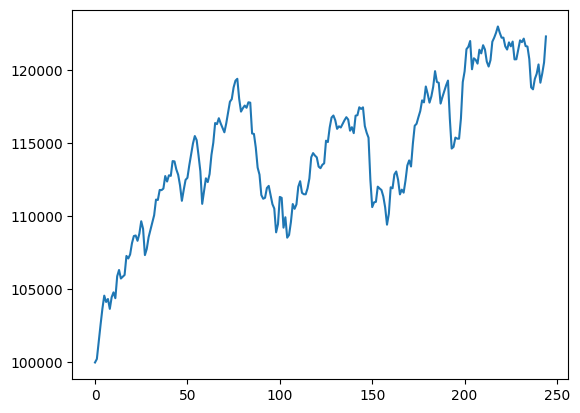

In [17]:
# initialiser le capital
C = 100000 

Ct=[C]

S = [[] for _ in range(12)] # liste vide pour stocker les prix des actions

for i in range(12):
    S[i] = [(BD2019[i].iloc[j, 3]+BD2019[i].iloc[j,4])/2 for j in range(len(BD2019[i]))] # S[i] est la liste des prix de l'action i en 2019

S0 = np.array([S[i][0] for i in range(12)]) # S0 contient les prix de chaque action le premier jour de 2019

theta=np.array([int(C*x_opt[i]/S0[i]) for i in range(12)])  #theta est le nombre d'actions initiales, c'est-à-dire le nombre initial d'actions achetées pour chaque action, capital total * pourcentage / prix
thetaT=np.transpose(theta)
cash = C - np.dot(thetaT,S0) # cash est le capital restant après l'achat des actions
#print("Prix des actions après le 1er jour :", np.dot(theta, S0))
#print("Montant de trésorerie restant après le 1er jour :", cash)
#CashList = [cash]  # Stocke la trésorerie correspondante à chaque instant t

#deuxième jour à la fin de 2019
for t in range (1,len(BD2019[0])): #len(BD2019[0])est le nombre de jours en 2019


    #1.calculer le nouveau capital
    St=np.array([S[i][t] for i in range(12)]) # St contient les prix de chaque action le jour t de 2019
    C=cash + np.dot(thetaT,St)  # cash est le capital à l'instant t-1, thetaT est la quantité détenue à l'instant t-1, St est le prix de l'action à l'instant t
    # 2.calculer la nouvelle quantité d'actions
    theta=np.array([int(C*x_opt[i]/S[i][t]) for i in range(12)])
    thetaT=np.transpose(theta)  
    # 3.calculer le nouveau capital restant
    cash = C - np.dot(thetaT,St)

    Ct.append(C)
    #CashList.append(cash)

#print(CashList)
plt.plot(Ct)

### B.2 Code nettoyé

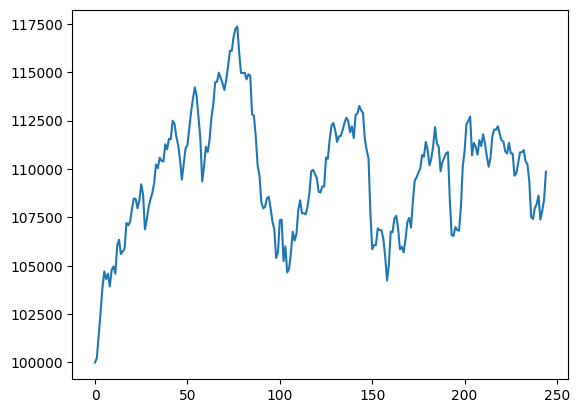

In [18]:

C = 100000 # capital initial
Ct=[C]

S = [[] for _ in range(12)] # liste vide pour stocker les prix des actions


for i in range(12):
    S[i] = [(BD2019[i].iloc[j, 3]+BD2019[i].iloc[j,4])/2 for j in range(len(BD2019[i]))] # S[i] est la liste des prix de l'action i en 2019

#2.calculer le capital et la valeur totale des actions après le premier jour, S0 est le prix de chaque action le premier jour de 2019
S0 = np.array([S[i][0] for i in range(12)]) 
theta=np.array([int(C*x_opt[i]/S0[i]) for i in range(12)]) 
thetaT=np.transpose(theta)
cash = C - np.dot(thetaT,S0) 

#3.calculer le capital deu deuxième jour à la fin de 2019, St est le prix de chaque action le jour t de 2019
for t in range (1,len(BD2019[0])): 
    St=np.array([S[i][t] for i in range(12)]) 
    C=cash + np.dot(thetaT,St) 
    theta=np.array([int(C*x_opt[i]/S[i][t]) for i in range(12)])
    thetaT=np.transpose(theta)  
    Ct.append(C)

plt.plot(Ct)


## C. Appliquer la prix de transaction
**Soit** k un coût de transaction $$(k = \tfrac{S}{100}\bigr).(initial)$$ 

On définit la valeur du portefeuille après transaction à l’instant \(t\) comme :

$$
C_t \;=\; C \;-\; \mathrm{Cout_t}
$$

où le coût de transaction \(\mathrm{Cout}_t\) s’écrit :

$$
\mathrm{Cout}_t 
\;=\; 
\sum_{i}
\Bigl|\theta_{\mathrm{ancienne}}^{\,i} \;-\; \theta_{\mathrm{nouveaux}}^{\,i}\Bigr|
\,\times\, S_t^i 
\,\times\, k.
$$

---

**Projet :**
- $ k = \frac{S}{100} $ (faire varier  …)  
- $ f(\sigma_{\max}) $ : faire varier $\sigma_{\max}$  
- Étude complète du problème : « Combien avez-vous gagné ? »  
- Possibilité de choisir d’autres actions.

